In [17]:
import os
import numpy as np
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 150

# Testing HEALPix SCREAM 1H Data

This notebook tests reading and visualizing HEALPix SCREAM 1H data.

In [18]:
in_dir = '/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/'
# in_file = f'{in_dir}SCREAMv1_1H_zoom9_20190801_20190802.zarr'
# in_file = f'{in_dir}SCREAMv1_1H_zoom9_20190810_20190811.zarr'
# in_file = f'{in_dir}SCREAMv1_1H_zoom9_20190801_20190805.zarr'
in_file = f'{in_dir}SCREAMv1_1H_zoom9_20190801_20200410.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

# # Also check if zoom 8 exists for comparison
# zoom8_file = f'{in_dir}SCREAMv1_1H_zoom8_20190801_20190802.zarr'
# print(f"Zoom 8 file exists: {os.path.exists(zoom8_file)}")

/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/SCREAMv1_1H_zoom9_20190801_20200410.zarr exists: True


In [19]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 229GB
Dimensions:           (time: 6059, cell: 3145728)
Coordinates:
  * time              (time) datetime64[ns] 48kB 2019-08-01 ... 2020-04-10T10...
    crs               int64 8B 0
  * cell              (cell) int32 13MB 0 1 2 3 ... 3145725 3145726 3145727
    lat               (cell) float64 25MB 0.0746 0.1492 ... -0.1492 -0.0746
    lon               (cell) float64 25MB 45.0 45.09 44.91 ... 315.1 314.9 315.0
Data variables:
    max_reflectivity  (time, cell) float32 76GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    pr                (time, cell) float32 76GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    rlut              (time, cell) float32 76GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      3145728
    healpix_nside:     512
    healpix_order:     9
    original_grid:     unstructured
    remapping_method:  delaunay_triangulation

In [20]:
ds.time.isel(time=slice(0, 24))

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2019-08-01T00:00:00.000000000', '2019-08-01T01:00:00.000000000',
       '2019-08-01T02:00:00.000000000', '2019-08-01T03:00:00.000000000',
       '2019-08-01T04:00:00.000000000', '2019-08-01T05:00:00.000000000',
       '2019-08-01T06:00:00.000000000', '2019-08-01T07:00:00.000000000',
       '2019-08-01T08:00:00.000000000', '2019-08-01T09:00:00.000000000',
       '2019-08-01T10:00:00.000000000', '2019-08-01T11:00:00.000000000',
       '2019-08-01T12:00:00.000000000', '2019-08-01T13:00:00.000000000',
       '2019-08-01T14:00:00.000000000', '2019-08-01T15:00:00.000000000',
       '2019-08-01T16:00:00.000000000', '2019-08-01T17:00:00.000000000',
       '2019-08-01T18:00:00.000000000', '2019-08-01T19:00:00.000000000',
       '2019-08-01T20:00:00.000000000', '2019-08-01T21:00:00.000000000',
       '2019-08-01T22:00:00.000000000', '2019-08-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 192B 2019-08-01 ... 2019-08-01T23:00:00
    crs      int64 8B 0

In [21]:
ds.time[-10:]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2020-04-10T01:00:00.000000000', '2020-04-10T02:00:00.000000000',
       '2020-04-10T03:00:00.000000000', '2020-04-10T04:00:00.000000000',
       '2020-04-10T05:00:00.000000000', '2020-04-10T06:00:00.000000000',
       '2020-04-10T07:00:00.000000000', '2020-04-10T08:00:00.000000000',
       '2020-04-10T09:00:00.000000000', '2020-04-10T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2020-04-10T01:00:00 ... 2020-04-10T10:...
    crs      int64 8B 0

In [22]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2019-08-01 00:00'

In [23]:
ds.pr.attrs

{'cell_methods': 'time: point',
 'long_name': 'MISSING',
 'standard_name': 'MISSING',
 'units': 'm/s'}

<Figure size 960x720 with 0 Axes>

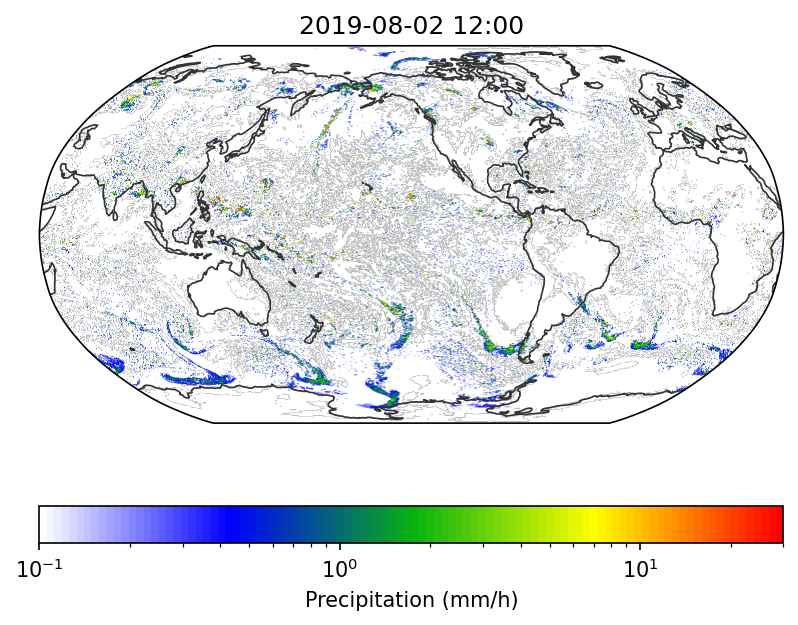

In [24]:
itime = 36
VAR = ds.pr.isel(time=itime) * 3600000  # Convert from m/s to mm/h
im = egh.healpix_show(VAR.where(VAR > 0), norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/h)')

In [25]:
def concat_cmaps(cmaps_list, ratios, discrete=256, trim_left=0.0, trim_right=0.0):
    """
    Concatenate multiple colormaps with optional trimming.
    
    Parameters:
    -----------
    cmaps_list : list
        List of colormaps to concatenate
    ratios : list
        List of ratios for each colormap (should sum to 1.0)
    discrete : int
        Total number of discrete colors in the output
    trim_left : float
        Fraction to trim from the left (start) of each colormap (0.0 to 1.0)
    trim_right : float
        Fraction to trim from the right (end) of each colormap (0.0 to 1.0)
    """
    total_colors = discrete
    all_colors = []
    
    for i, (cmap, ratio) in enumerate(zip(cmaps_list, ratios)):
        n_colors = int(total_colors * ratio)
        
        # Calculate the range to sample from, accounting for trimming
        start = trim_left
        end = 1.0 - trim_right
        
        # Sample colors from the trimmed range
        colors = cmap(np.linspace(start, end, n_colors))
        all_colors.append(colors)
    
    return ListedColormap(np.vstack(all_colors))

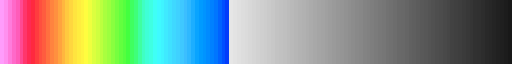

In [26]:
c1 = cmaps.GMT_wysiwygcont.reversed()
c2 = cmaps.gray.reversed()
cmap_tb = concat_cmaps([c1, c2], [0.45, 0.55], discrete=135, trim_left=0.1, trim_right=0.1)
cmap_tb

In [27]:
def olr_to_tb(OLR):
    """
    Convert OLR to IR brightness temperature.

    Args:
        OLR: np.array
            Outgoing longwave radiation
    
    Returns:
        tb: np.array
            Brightness temperature
    """
    # Calculate brightness temperature
    # (1984) as given in Yang and Slingo (2001)
    # Tf = tb(a+b*Tb) where a = 1.228 and b = -1.106e-3 K^-1
    # OLR = sigma*Tf^4 
    # where sigma = Stefan-Boltzmann constant = 5.67x10^-8 W m^-2 K^-4
    a = 1.228
    b = -1.106e-3
    sigma = 5.67e-8 # W m^-2 K^-4
    tf = (OLR/sigma)**0.25
    tb = (-a + np.sqrt(a**2 + 4*b*tf))/(2*b)
    return tb

Text(0.5, 0.98, '2019-08-07 06:00')

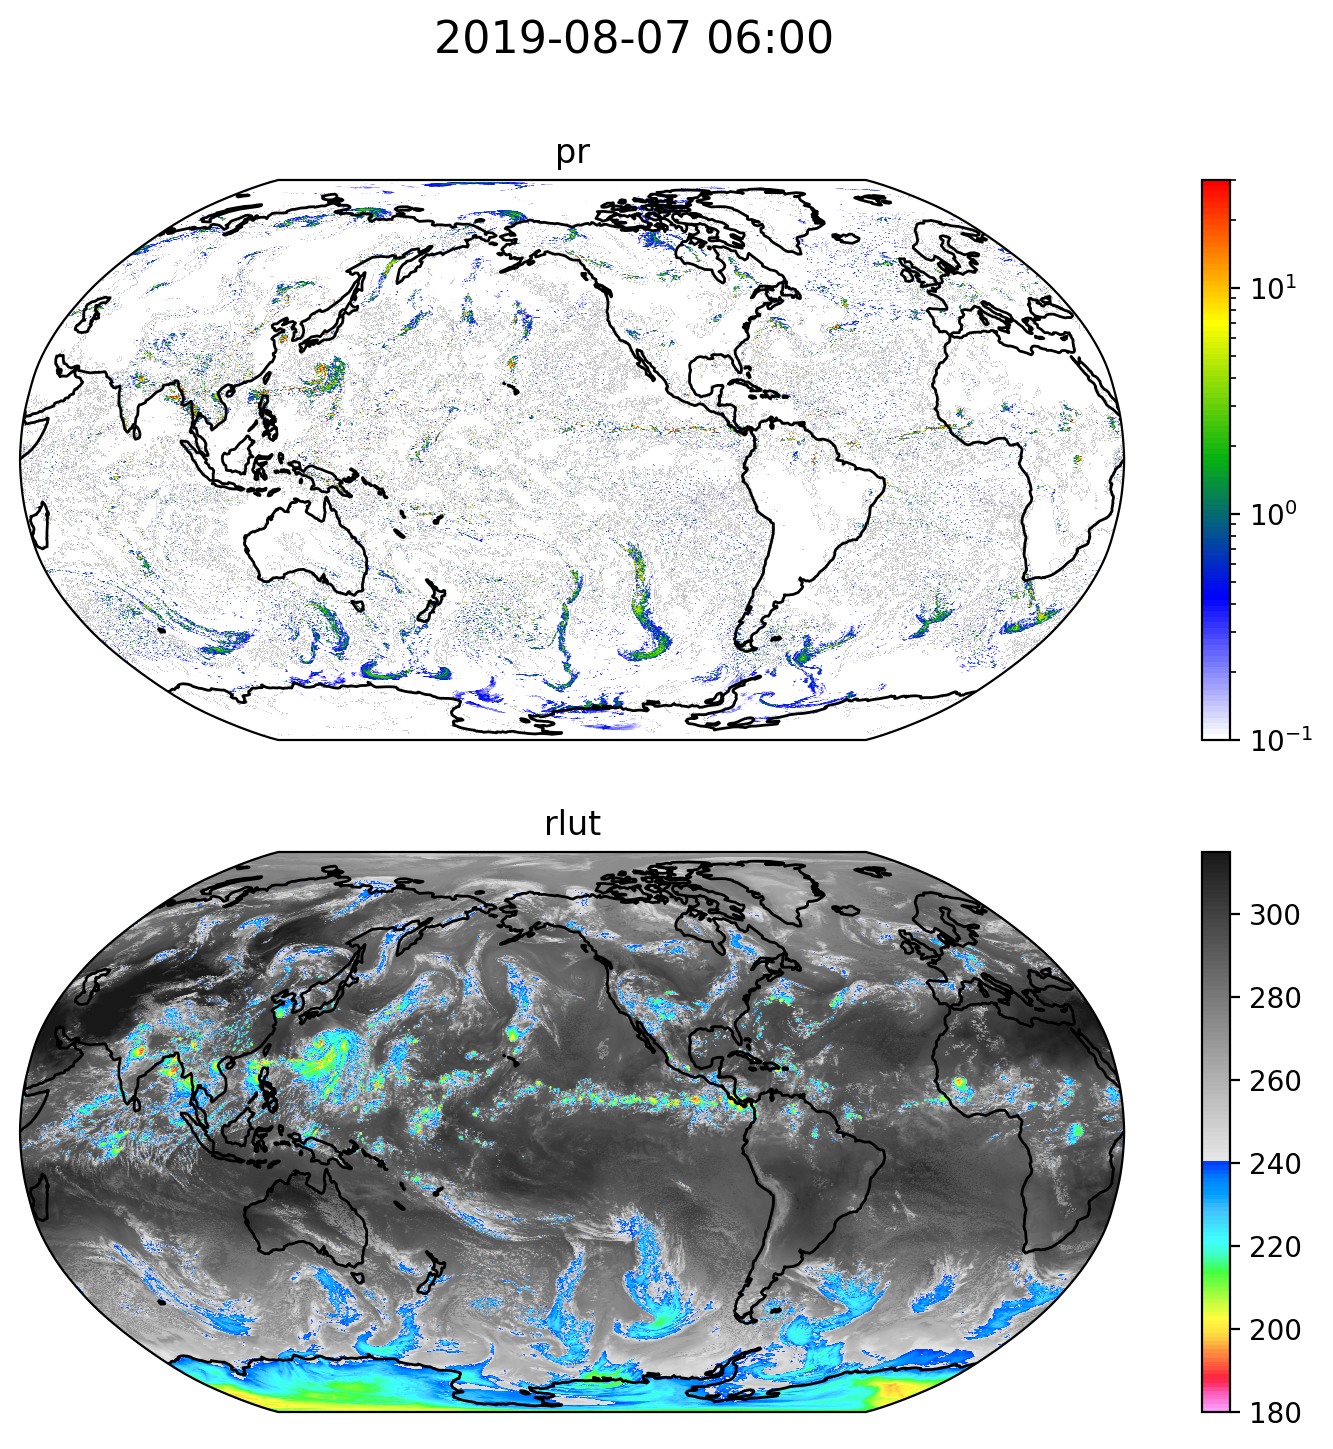

In [39]:
itime = 150
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)}, dpi=200)
def egh_plot(data, ax, **kwargs):
    ax.set_title(data.name)
    ax.set_global()
    im = egh.healpix_show(data, ax=ax, **kwargs)
    plt.colorbar(im, ax=ax)
    ax.coastlines()

time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
pr = ds.pr.isel(time=itime) * 3600000  # Convert from mm/s to mm/h
tb = olr_to_tb(ds.rlut.isel(time=itime))
egh_plot(pr, ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
egh_plot(tb, ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
fig.suptitle(f"{time_str}", fontsize=16)

In [13]:
# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})

# time_str = ds8.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
# egh_plot(ds8.precipitation.isel(time=itime), ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
# egh_plot(ds8.Tb.isel(time=itime), ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
# fig.suptitle(f"{time_str} (zoom 8)", fontsize=16)

<Figure size 960x720 with 0 Axes>

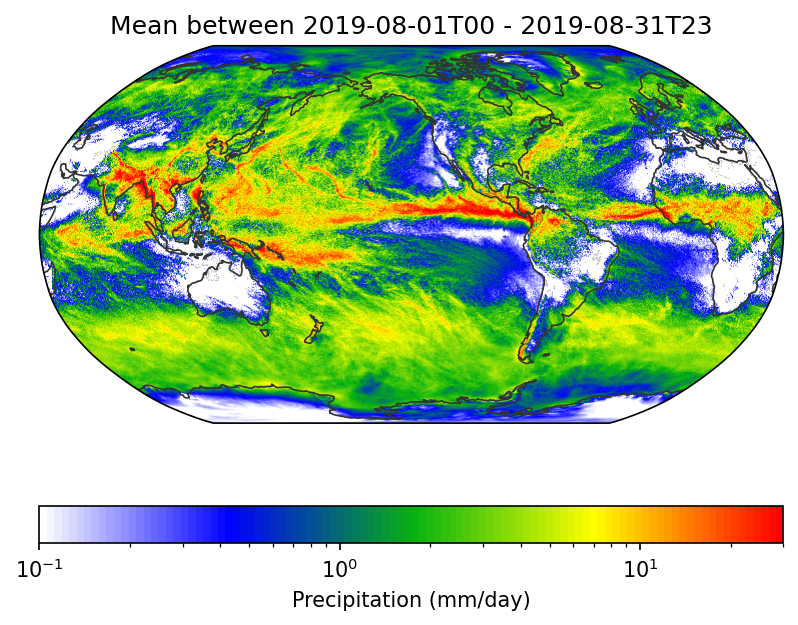

In [33]:
# time_str1 = '2019-08-02T00'
# time_str2 = '2019-08-03T23'
time_str1 = '2019-08-01T00'
time_str2 = '2019-08-31T23'
pr = ds.pr.sel(time=slice(time_str1, time_str2)) * 3600000  # Convert from mm/s to mm/h
pr_avg = pr.mean(dim='time') * 24
im = egh.healpix_show(pr_avg,norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')

<Figure size 960x720 with 0 Axes>

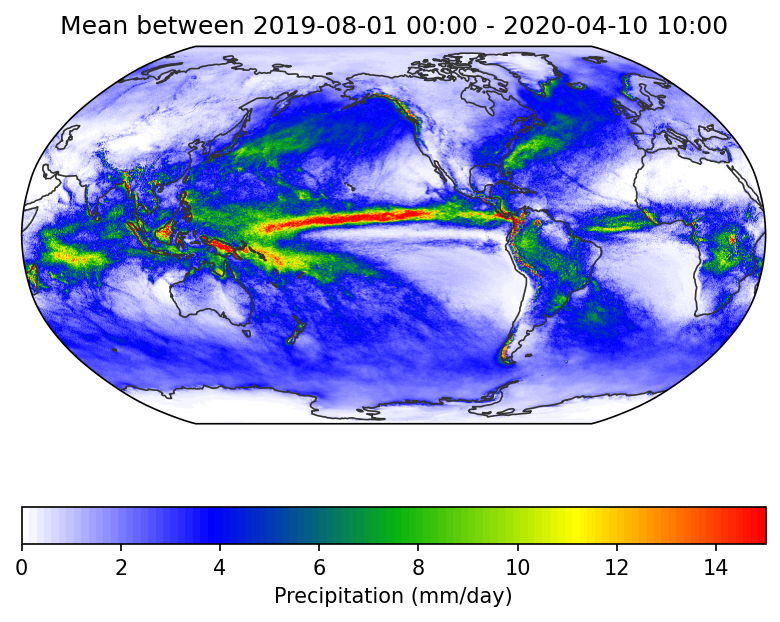

In [ ]:
pr_avg = ds.pr.mean(dim='time') * 3600000 * 24
im = egh.healpix_show(pr_avg, norm=mpl.colors.Normalize(vmin=0, vmax=15), cmap=cmaps.WhBlGrYeRe)
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')

In [16]:
# pcp_avg = ds8.precipitation.mean(dim='time') * 24
# im = egh.healpix_show(pcp_avg,norm=mpl.colors.Normalize(vmin=0, vmax=15), cmap=cmaps.WhBlGrYeRe)
# time_str1 = ds8.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
# time_str2 = ds8.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
# plt.title(f'Mean between {time_str1} - {time_str2} (zoom 8)')
# plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')